In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.animation as animation

In [3]:
n_points = 60
l = 30
c = 1
x = np.linspace(0,l,n_points)
dx = x[1]-x[0]
y = np.linspace(0,l,n_points)
dy = y[1]-y[0]
alpha = 0.5
dt = alpha*dx**2 /c
t = np.arange(0,60,dt)
X, Y = np.meshgrid(x,y)
evolucion= []

In [4]:
def gaussian_3D (X,Y):
    A=1.5
    sigma = 1
    x0 = 15
    y0 = 10
    return A*np.exp(-((((X-x0)**2)/(2*sigma*2))+(((Y-x0)**2)/(2*sigma*2))))

In [5]:
#phi = gaussian_3D(X,Y)
phi = np.zeros((n_points,n_points))
phi[int(np.size(x)/2),int(np.size(y)/3)] =1.5
bar_x = int(np.shape(phi)[1]/2)
bar_y = int(2*np.shape(phi)[1]/3)
for i in range(np.shape(phi)[0]):
    for j in range(np.shape(phi)[1]):
        if (i==0 or i==np.shape(phi)[0]-1 or j==0 or j==np.shape(phi)[1]-1):
            phi[i,j] = 0
phi[bar_x-10:bar_x+10,bar_y] = 0
evolucion.append(phi)

In [6]:
phi_1 = np.zeros((n_points,n_points))
for i in range(1,np.shape(phi)[0]-1):
    for j in range(1,np.shape(phi)[1]-1):
        if(j == bar_y and i<bar_x-10 and i>bar_x+10):
            continue
        phi_1[i,j] = phi[i,j] + alpha*(phi[i+1,j]-2*phi[i,j]+phi[i-1,j])+alpha*(phi[i,j+1]-2*phi[i,j]+phi[i,j-1])
evolucion.append(phi_1)

In [11]:
for k in range(2,np.size(t)):
    phi_2old = evolucion[k-2]
    phi_old = evolucion[k-1]
    phi_new = np.zeros((n_points,n_points))
    for i in range(1,np.shape(phi_old)[0]-1):
        for j in range(1,np.shape(phi_old)[1]-1):
            if(j == bar_y and i<bar_x-10 and i>bar_x+10):
                continue
            phi_new[i,j] = (2*phi_old[i,j] - phi_2old[i,j]) + alpha*(phi_old[i+1,j]-2*phi_old[i,j]+phi_old[i-1,j])+alpha*(phi_old[i,j+1]-2*phi_old[i,j]+phi_old[i,j-1])
    evolucion.append(phi_new)

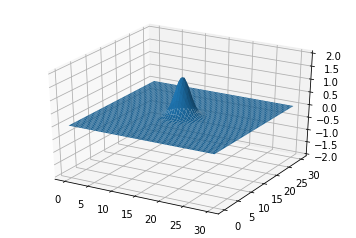

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, evolucion[0],rstride=1,cstride=1)
ax.set_zlim(-2,2)
plt.show()

In [12]:
def sequence(i):
    ax.clear()
    est_temp = estados[i]
    plt_temp = ax.plot_surface(X,Y,est_temp, rstride=1,cstride=1)
    return plt_temp,
a = animation.FuncAnimation(fig,sequence,np.size(t), interval = 25, blit=False)
plt.save("Ondaf1.mp4", fps=15)

AttributeError: module 'matplotlib.pyplot' has no attribute 'save'